# W&B (Weights and Biases) Tutorial [(Link)](https://wandb.ai/site)
* Author: [안재한](https://github.com/Dev-Jahn)

[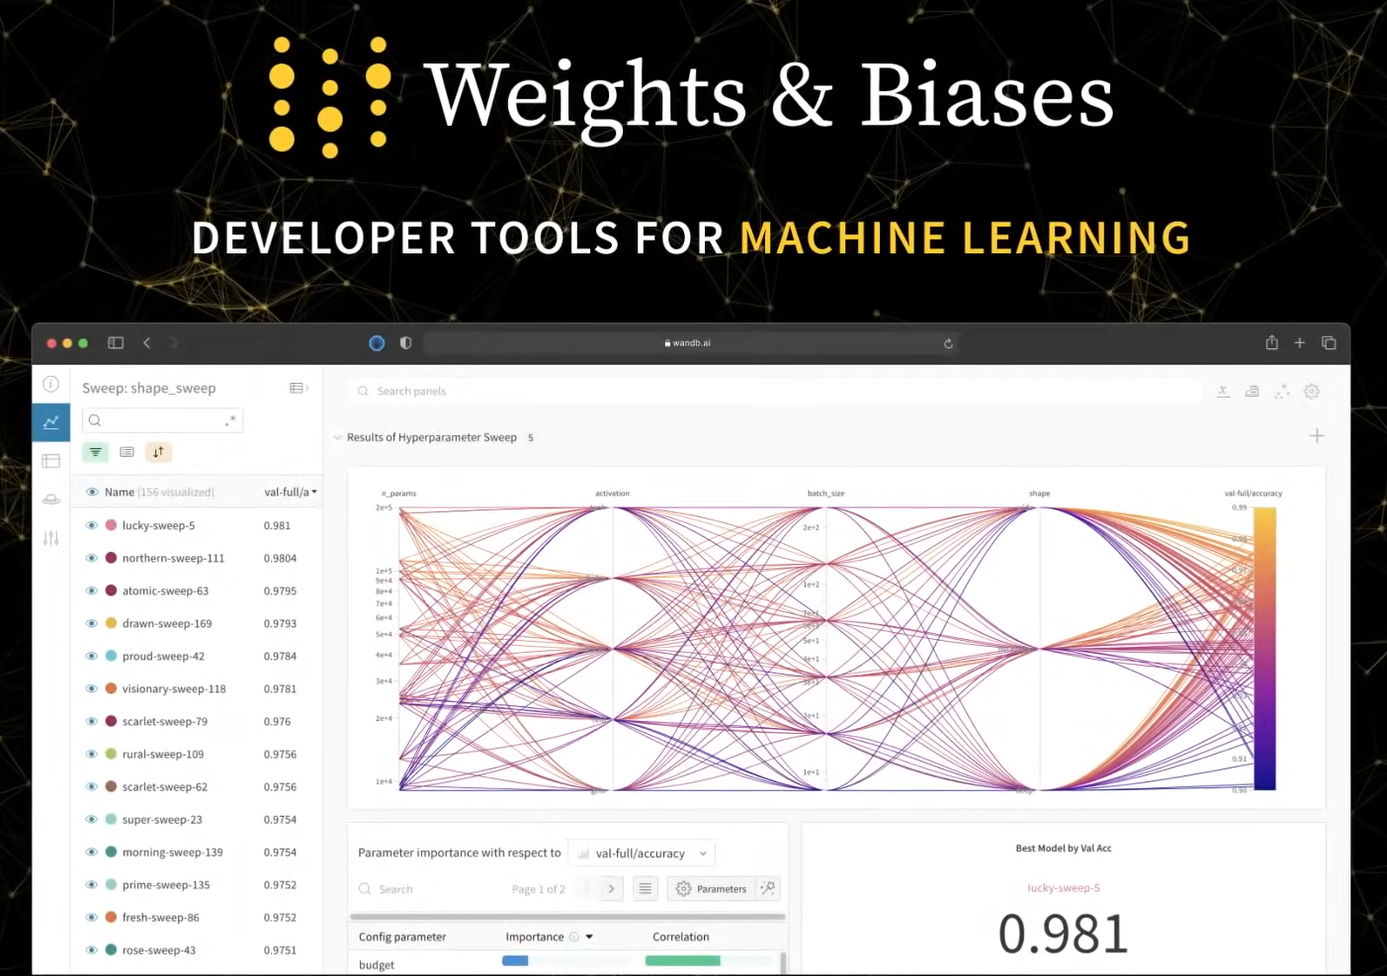](https://www.youtube.com/watch?v=krWjJcW80_A&t=3s)
## 계정 생성하기
***
* Github
* Google
* MS
* 자체 계정

## 기능들
***
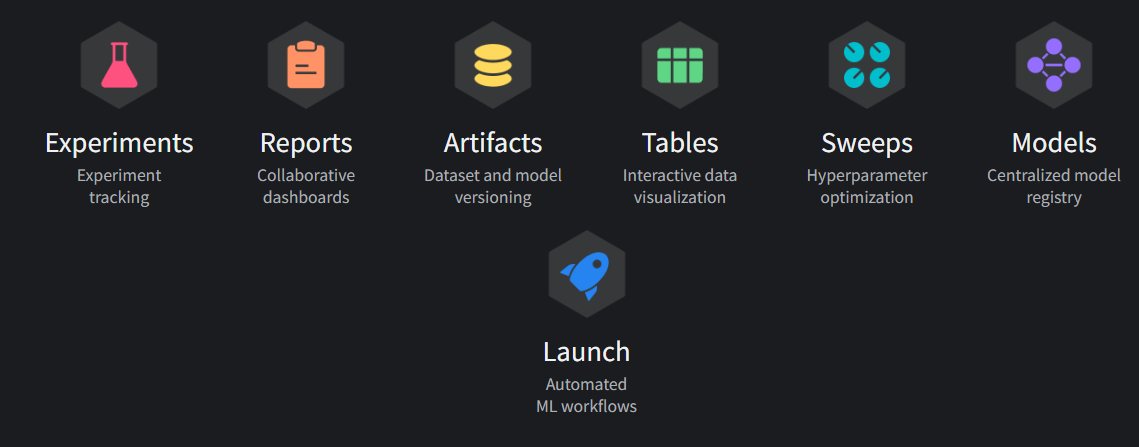
* 다양한 형태의 학습 트래킹 (성능지표, 이미지, 자연어, 오디오, 비디오, 3D 모델...etc)
* 리포트 생성
* 데이터셋, 모델 버전 관리
* 테이블을 이용한 데이터 시각화
* 하이퍼파라미터 튜닝
* 모델 저장 및 배포

## Documentation
***
근래들어 활발하게 기능이 개발되는 중이라 문서화가 잘 되어 있는 편
* [공식 Documentation](https://docs.wandb.ai/?_gl=1*1ffsiro*_ga*MTMwMjc3MzA0LjE2NzIzMzQ3NDc.*_ga_JH1SJHJQXJ*MTY3MjMzNDc0Ny4xLjEuMTY3MjMzNDg3Mi40NS4wLjA.)
    * [실험 추적 기능(로깅)](https://docs.wandb.ai/guides/track)
    * [하이퍼파라미터 튜닝](https://docs.wandb.ai/guides/sweeps)
    * [데이터, 모델 버전 관리](https://docs.wandb.ai/guides/data-and-model-versioning)
    * [모델 라이프사이클 관리](https://docs.wandb.ai/guides/models)
    * [데이터 시각화](https://docs.wandb.ai/guides/data-vis)
    * [리포트 생성하기](https://docs.wandb.ai/guides/reports)
    * [Pytorch, Keras, Hugging Face 등과 연동하기](https://docs.wandb.ai/guides/integrations)
* [파이썬 레퍼런스(모듈, 함수 명세)](https://docs.wandb.ai/ref/python)
    
## Forum
***
모르는 게 있으면 [Forum](https://community.wandb.ai/?_gl=1*kvghcf*_ga*MTMwMjc3MzA0LjE2NzIzMzQ3NDc.*_ga_JH1SJHJQXJ*MTY3MjMzNDc0Ny4xLjEuMTY3MjMzNDk0Ny41OC4wLjA.)에 질문해도 됩니다

## 기본 구조
***
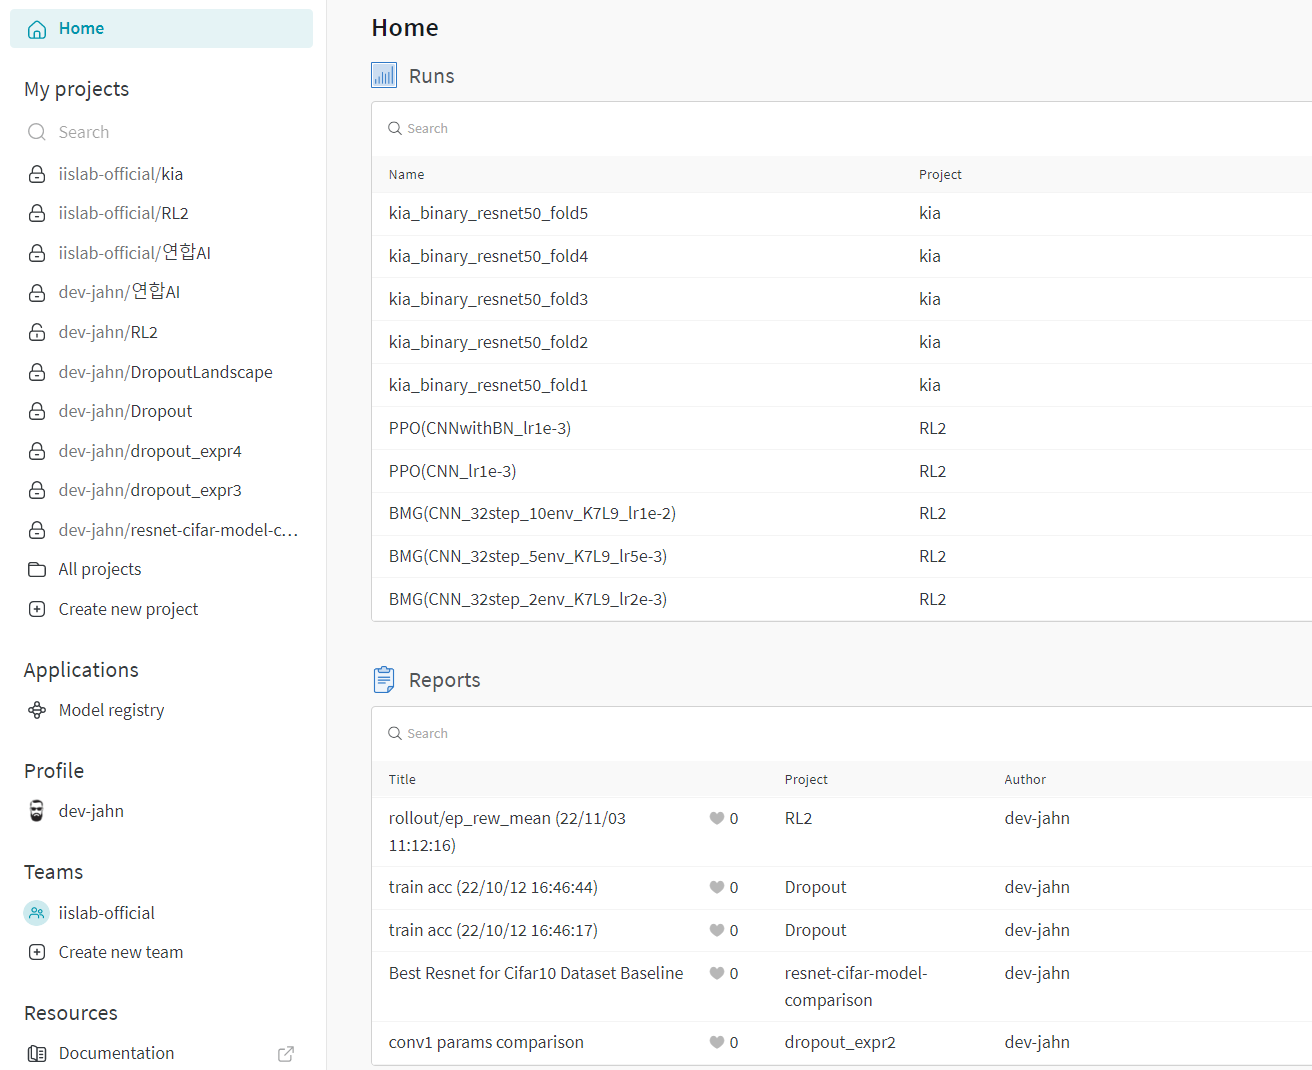

프로젝트를 생성하고 로깅을 시작하면, 각 프로젝트 내에 run이라는 형태로 일련의 기록들이 저장됨

## 시작하기
***
[[링크]](https://wandb.ai/quickstart) 에서 `Your API key` 클릭하여 복사해두기

In [2]:
!pip install wandb
!wandb login
# 이후 방금 복사한 key입력

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
wandb: Currently logged in as: iislab-official (use `wandb login --relogin` to force relogin)


`로그인에 대한 정보는 컴퓨터에 파일로 기록되므로 한번 로그인해두면 같은 기기에서는 다시 할 필요 없습니다`

## 학습, 평가 메트릭 기록하기
***

## 학습중 이미지 업로드
***
Vision 관련 딥러닝 모델들을 학습할 때는 정확도, loss값등 단순 수치보다 시각적으로 진척을 확인해야 할 때가 많음
* 모델이 이미지에서 올바른 특징들을 잡아내고 있는지
* 객체탐지를 잘하는지
* segmentation이 정상적으로 되는지

등 을 실시간으로 확인할 수 있어야 학습 잘못 돌려놓고 며칠뒤에 깨닫는 일이 없음...

## 모델 저장, 버전관리 + Netron viewer를 이용한 시각화
***

![image.png](attachment:08adb596-c935-487a-8928-2e8bb5c363cb.png![download.png](attachment:9e17281f-f726-419d-b49a-0b3ae1fbf4e2.png))
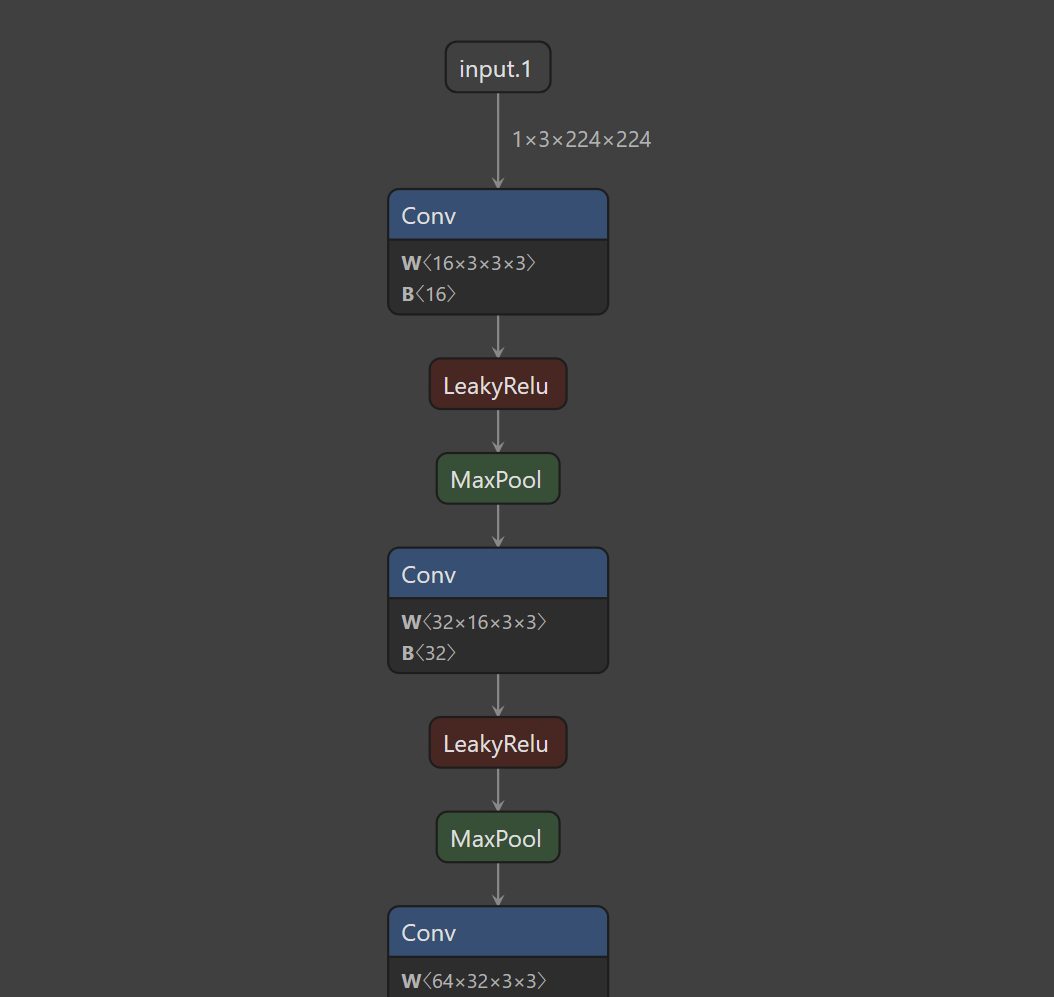
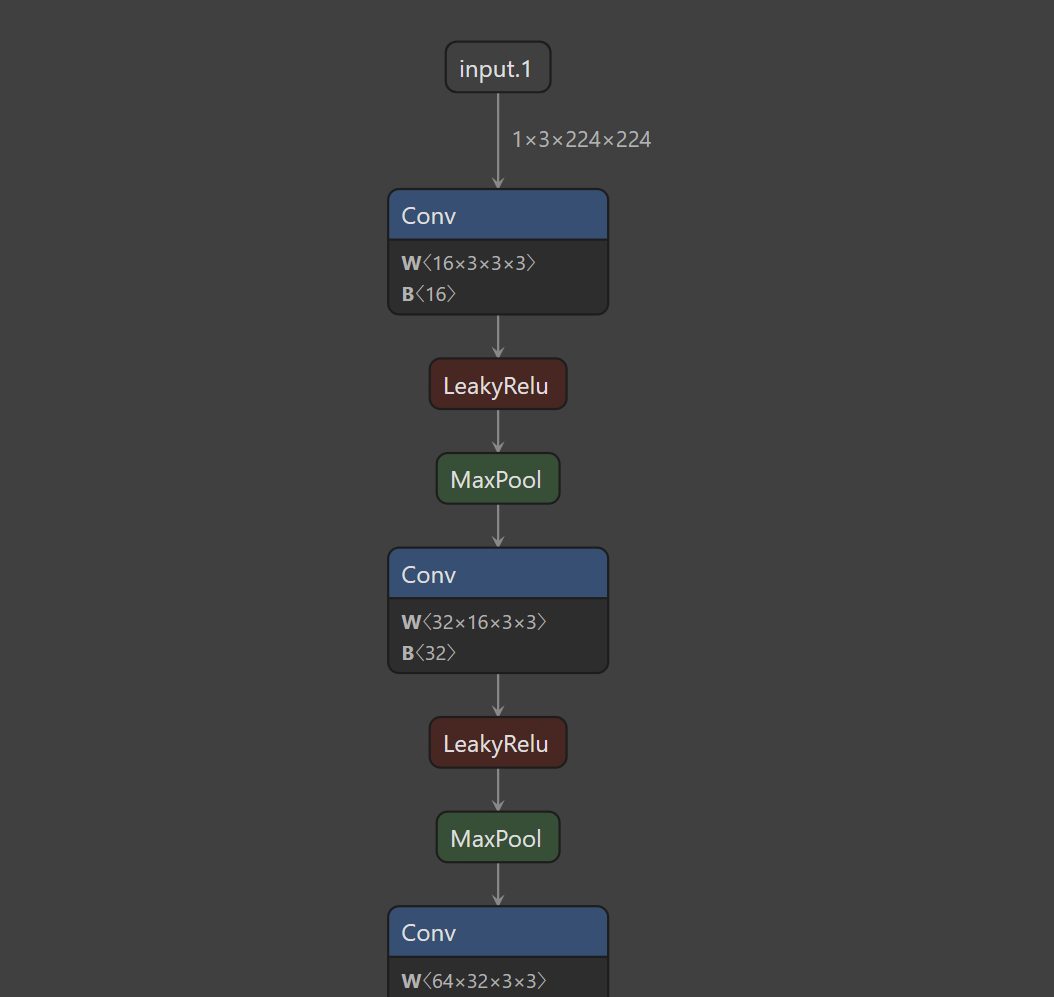

*더 알고싶으신 분은 [공식 Artifact 가이드](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/wandb-artifacts/Pipeline_Versioning_with_W%26B_Artifacts.ipynb#scrollTo=6gLwSc1SOajB) 참고*